<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [6]:
## Write your code here

# Step 1: Display column names
print("Column Names:\n", df.columns.tolist())

# Step 2: Display data types
print("\nData Types:\n", df.dtypes)

# Step 3: Display summary information
print("\nSummary Information:")
df.info()

# Step 4: Display descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
print(df.describe())

Column Names:
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncW

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [7]:
## Write your code here

# Count missing values in each column
missing_values = df.isnull().sum()
# Display columns with missing values
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])

df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].median(), inplace=True)

print("Missing Values After Handling:\n", df.isnull().sum().sum())  # Should be 0 if all handled


Missing Values in Each Column:
 RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


/tmp/ipykernel_962/206656354.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].median(), inplace=True)


Missing Values After Handling:
 2848955


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [8]:
## Write your code here
print("Employment Type Distribution:\n")
print(df["Employment"].value_counts())
print("\nJob Satisfaction Distribution:\n")
print(df["JobSat"].value_counts())
print("\nProfessional Coding Experience Distribution:\n")
print(df["YearsCodePro"].value_counts())


Employment Type Distribution:

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but look

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


/tmp/ipykernel_962/1687772057.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["JobSat"], shade=True, color="blue")


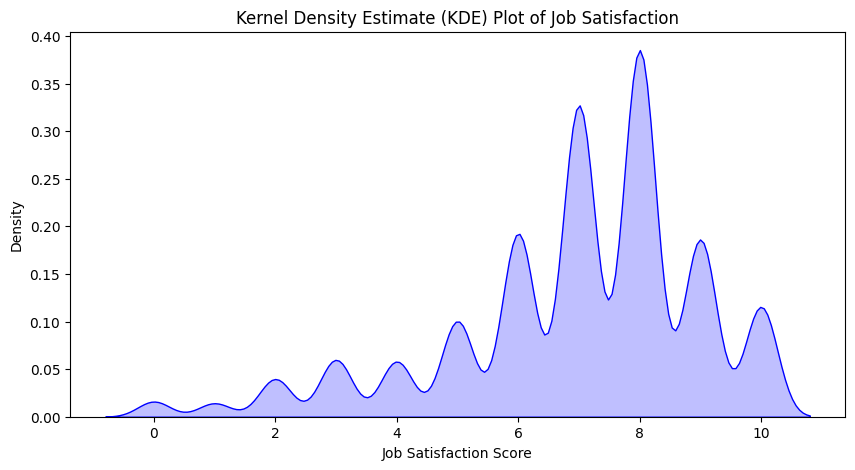

In [9]:
## Write your code here
import seaborn as sns

# Check if JobSat is numeric before plotting KDE
if pd.api.types.is_numeric_dtype(df["JobSat"]):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df["JobSat"], shade=True, color="blue")
    plt.title("Kernel Density Estimate (KDE) Plot of Job Satisfaction")
    plt.xlabel("Job Satisfaction Score")
    plt.ylabel("Density")
    plt.show()
else:
    print("JobSat column is categorical. KDE plot is not applicable.")


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


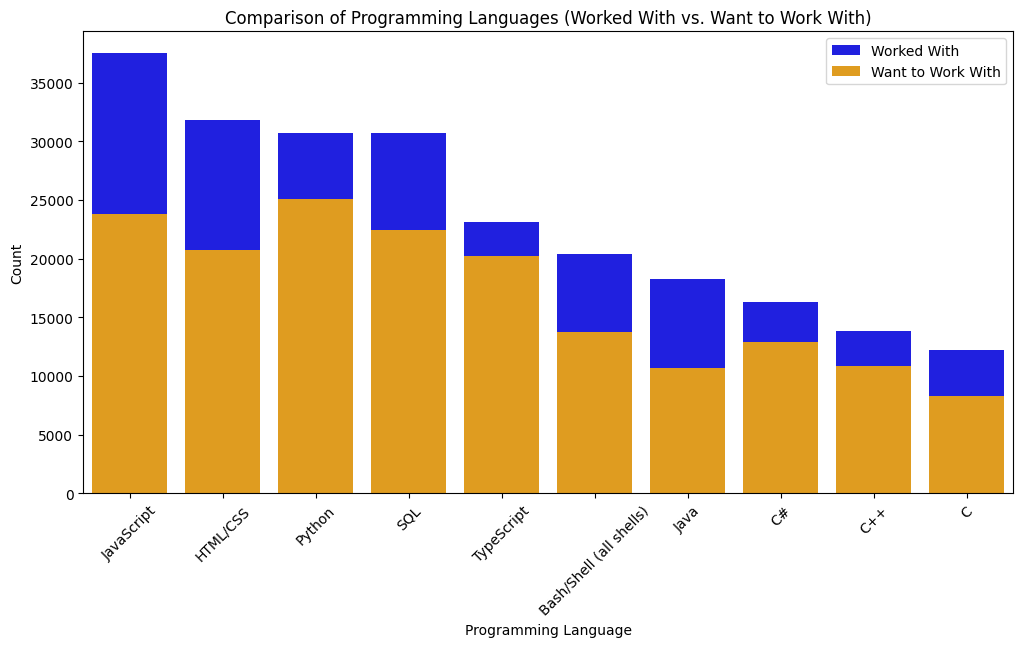

In [12]:
## Write your code here
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib_venn import venn2

# Split the values and count occurrences
worked_languages = Counter(";".join(df["LanguageHaveWorkedWith"].dropna()).split(";"))
wanted_languages = Counter(";".join(df["LanguageWantToWorkWith"].dropna()).split(";"))

# Convert to DataFrames for easy visualization
worked_df = pd.DataFrame.from_dict(worked_languages, orient="index", columns=["Worked"]).reset_index()
wanted_df = pd.DataFrame.from_dict(wanted_languages, orient="index", columns=["Wanted"]).reset_index()

# Merge both DataFrames
lang_df = pd.merge(worked_df, wanted_df, on="index", how="outer").fillna(0)
lang_df.columns = ["Language", "Worked", "Wanted"]

# Sort by frequency
lang_df = lang_df.sort_values(by="Worked", ascending=False)

# # Convert language sets for Venn diagram
# set_worked = set(worked_languages.keys())
# set_wanted = set(wanted_languages.keys())

# # Plot Venn Diagram
# plt.figure(figsize=(6, 6))
# venn2([set_worked, set_wanted], set_labels=("Worked With", "Want to Work With"))
# plt.title("Overlap Between Worked and Wanted Programming Languages")
# plt.show()


# Select top 10 languages based on experience
top_langs = lang_df.head(10)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Language", y="Worked", data=top_langs, color="blue", label="Worked With")
sns.barplot(x="Language", y="Wanted", data=top_langs, color="orange", label="Want to Work With")

plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Programming Language")
plt.title("Comparison of Programming Languages (Worked With vs. Want to Work With)")
plt.legend()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x600 with 0 Axes>

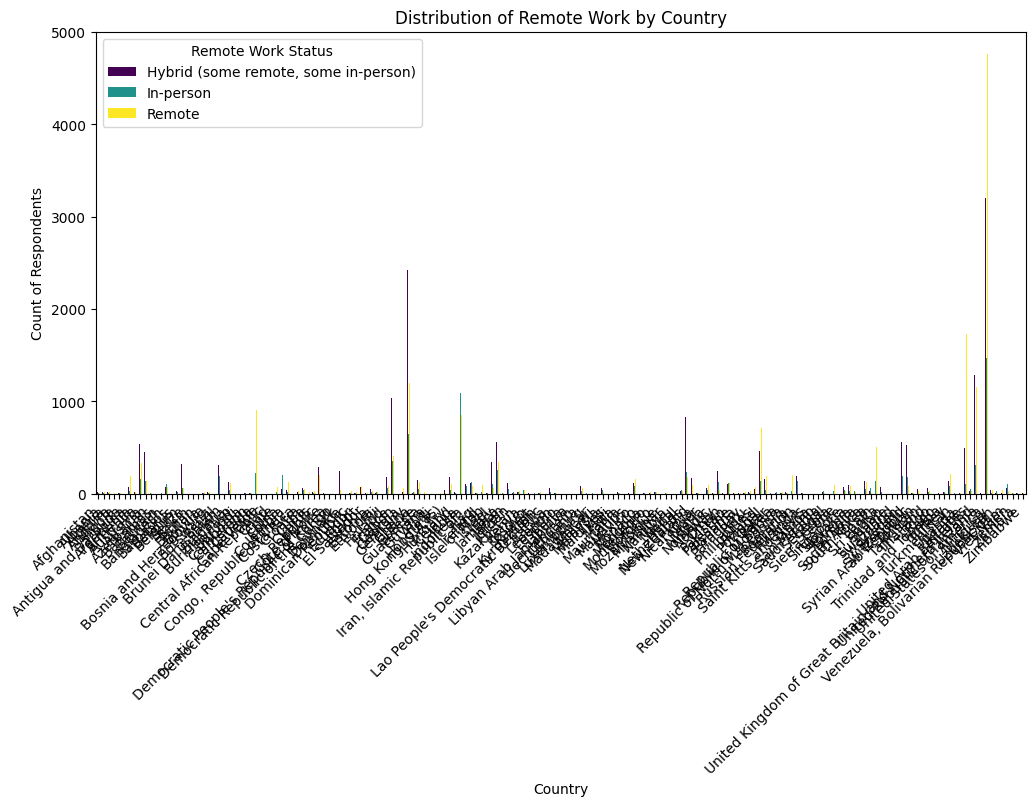

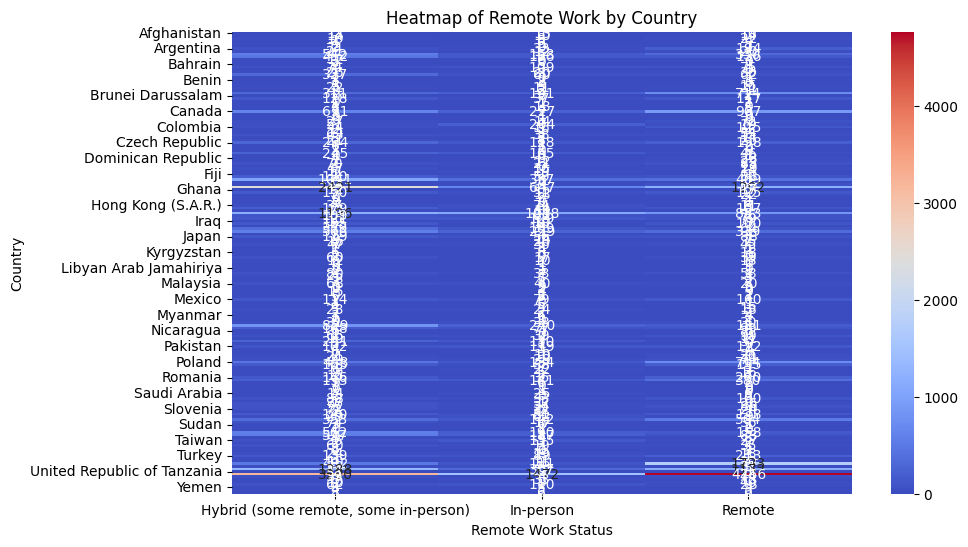

In [26]:
# Ensure no missing values in key columns
df = df.dropna(subset=["Country", "RemoteWork"])

# Group data by Country and RemoteWork
country_remote_counts = df.groupby(["Country", "RemoteWork"]).size().unstack()

# Fill missing values with 0
country_remote_counts = country_remote_counts.fillna(0)
# Plot grouped bar chart
plt.figure(figsize=(12, 6))
country_remote_counts.plot(kind="bar", stacked=False, colormap="viridis", figsize=(12, 6))

plt.xlabel("Country")
plt.ylabel("Count of Respondents")
plt.title("Distribution of Remote Work by Country")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Remote Work Status")
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(country_remote_counts, annot=True, cmap="coolwarm", fmt=".0f")

plt.xlabel("Remote Work Status")
plt.ylabel("Country")
plt.title("Heatmap of Remote Work by Country")
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [27]:
## Write your code here
print(df[["JobSat", "YearsCodePro"]].info())  # Check data types and missing values
# Convert 'YearsCodePro' to numeric (if it's not already)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")
# Define mapping (adjust based on your dataset)
job_sat_mapping = {
    "Very satisfied": 5,
    "Satisfied": 4,
    "Neutral": 3,
    "Dissatisfied": 2,
    "Very dissatisfied": 1
}

# Apply mapping
df["JobSat_Numeric"] = df["JobSat"].map(job_sat_mapping)
df_clean = df.dropna(subset=["YearsCodePro", "JobSat_Numeric"])
pearson_corr = df_clean["YearsCodePro"].corr(df_clean["JobSat_Numeric"], method="pearson")
print(f"Pearson Correlation: {pearson_corr:.4f}")
spearman_corr = df_clean["YearsCodePro"].corr(df_clean["JobSat_Numeric"], method="spearman")
print(f"Spearman Correlation: {spearman_corr:.4f}")


<class 'pandas.core.frame.DataFrame'>
Index: 49490 entries, 0 to 65435
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobSat        29117 non-null  float64
 1   YearsCodePro  46622 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.1+ MB
None
Pearson Correlation: nan
Spearman Correlation: nan


/tmp/ipykernel_962/2682723361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")
/tmp/ipykernel_962/2682723361.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["JobSat_Numeric"] = df["JobSat"].map(job_sat_mapping)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [29]:
## Write your code here


# Create cross-tabulation
employment_edlevel_crosstab = pd.crosstab(df["Employment"], df["EdLevel"], normalize="index")  # Normalize by row (Employment)
employment_edlevel_crosstab


EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",0.029232,0.458520,0.302212,0.004366,0.056847,0.039892,0.098866,0.010065
"Employed, full-time;Employed, part-time",0.046875,0.453125,0.317708,0.005208,0.036458,0.046875,0.078125,0.015625
"Employed, full-time;Independent contractor, freelancer, or self-employed",0.031298,0.414237,0.287205,0.007057,0.048481,0.054004,0.145443,0.012274
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",0.057325,0.471338,0.280255,0.006369,0.050955,0.031847,0.089172,0.012739
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
"Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time",0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time",0.000000,0.600000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000
"Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
